# Predicting players rating

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [5]:
df.describe(include='all')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,NaN,197,NaN,NaN,2,8,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,91989.50000,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


In [6]:
# Check Nan values
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [7]:
#Any duplicates
df.duplicated().any()

False

In [8]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
# drop columns those are not required 
df = df.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1)
df.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [10]:
df.dropna(subset=['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'], how='all', inplace=True)

In [11]:
df.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [12]:
df.isna().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle         1877
gk_diving                 0
gk_handling               0
gk_kicking          

In [13]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [14]:
df['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [15]:
df['attacking_work_rate'].fillna(method='ffill',inplace=True,axis=0)

In [16]:
df['attacking_work_rate'].value_counts()

medium    126858
high       43214
low         8659
None        3742
norm         360
le           112
y            108
stoc          89
Name: attacking_work_rate, dtype: int64

In [17]:
df['attacking_work_rate'].unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [18]:
awr_dummies = pd.get_dummies(df['attacking_work_rate'],prefix='awr').iloc[:, 1:]
awr_dummies.head()

,awr_high,awr_le,awr_low,awr_medium,awr_norm,awr_stoc,awr_y
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [19]:
df['volleys'].fillna((df['volleys'].mean()), inplace=True)
df['volleys'].isna().sum()

0

In [20]:
df['curve'].fillna((df['curve'].mean()), inplace=True)
df['curve'].isna().sum()

0

In [21]:
df['agility'].fillna((df['agility'].mean()), inplace=True)
df['agility'].isna().sum()

0

In [22]:
df['balance'].fillna((df['balance'].mean()), inplace=True)
df['balance'].isna().sum()

0

In [23]:
df['jumping'].fillna((df['jumping'].mean()), inplace=True)
df['jumping'].isna().sum()

0

In [24]:
df['vision'].fillna((df['vision'].mean()), inplace=True)
df['vision'].isna().sum()

0

In [25]:
df['sliding_tackle'].fillna((df['sliding_tackle'].mean()), inplace=True)
df['sliding_tackle'].isna().sum()

0

In [26]:
df['overall_rating'].unique()

array([67., 62., 61., 74., 73., 71., 70., 69., 68., 65., 64., 54., 51.,
       52., 47., 53., 66., 59., 75., 72., 76., 78., 77., 79., 60., 80.,
       81., 82., 84., 48., 63., 83., 55., 58., 50., 56., 49., 57., 42.,
       46., 45., 85., 44., 86., 89., 87., 88., 91., 40., 90., 41., 43.,
       38., 93., 92., 39., 33., 36., 37., 35., 94.])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    183142 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                183142 non-null float64
dribbling              183142 non-null float64
curve                  183142 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
sprint_speed           183142 non-null float64
agility                183142 non-null float64
reactions              183142 non-null float64

In [28]:
pf_dummies = pd.get_dummies(df['preferred_foot'],prefix='pf')
pf_dummies.head()

,pf_left,pf_right
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [29]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [30]:
dwr_dummies = pd.get_dummies(df['defensive_work_rate'],prefix='dwr').iloc[:, 1:]
dwr_dummies.head()

,dwr_1,dwr_2,dwr_3,dwr_4,dwr_5,dwr_6,dwr_7,dwr_8,dwr_9,dwr__0,dwr_ean,dwr_es,dwr_high,dwr_low,dwr_medium,dwr_o,dwr_ormal,dwr_tocky
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:
df = df.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1)
df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [32]:
df = pd.concat([df, awr_dummies,dwr_dummies,pf_dummies], axis=1)

In [33]:
df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'awr_high', 'awr_le',
       'awr_low', 'awr_medium', 'awr_norm', 'awr_stoc', 'awr_y', 'dwr_1',
       'dwr_2', 'dwr_3', 'dwr_4', 'dwr_5', 'dwr_6', 'dwr_7', 'dwr_8', 'dwr_9',
       'dwr__0', 'dwr_ean', 'dwr_es', 'dwr_high', 'dwr_low', 'dwr_medium',
       'dwr_o', 'dwr_ormal', 'dwr_tocky', 'pf_left', 'pf_right'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 62 columns):
overall_rating        183142 non-null float64
potential             183142 non-null float64
crossing              183142 non-null float64
finishing             183142 non-null float64
heading_accuracy      183142 non-null float64
short_passing         183142 non-null float64
volleys               183142 non-null float64
dribbling             183142 non-null float64
curve                 183142 non-null float64
free_kick_accuracy    183142 non-null float64
long_passing          183142 non-null float64
ball_control          183142 non-null float64
acceleration          183142 non-null float64
sprint_speed          183142 non-null float64
agility               183142 non-null float64
reactions             183142 non-null float64
balance               183142 non-null float64
shot_power            183142 non-null float64
jumping               183142 non-null float64
stamina        

In [35]:
df.isna().sum().any()

False

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

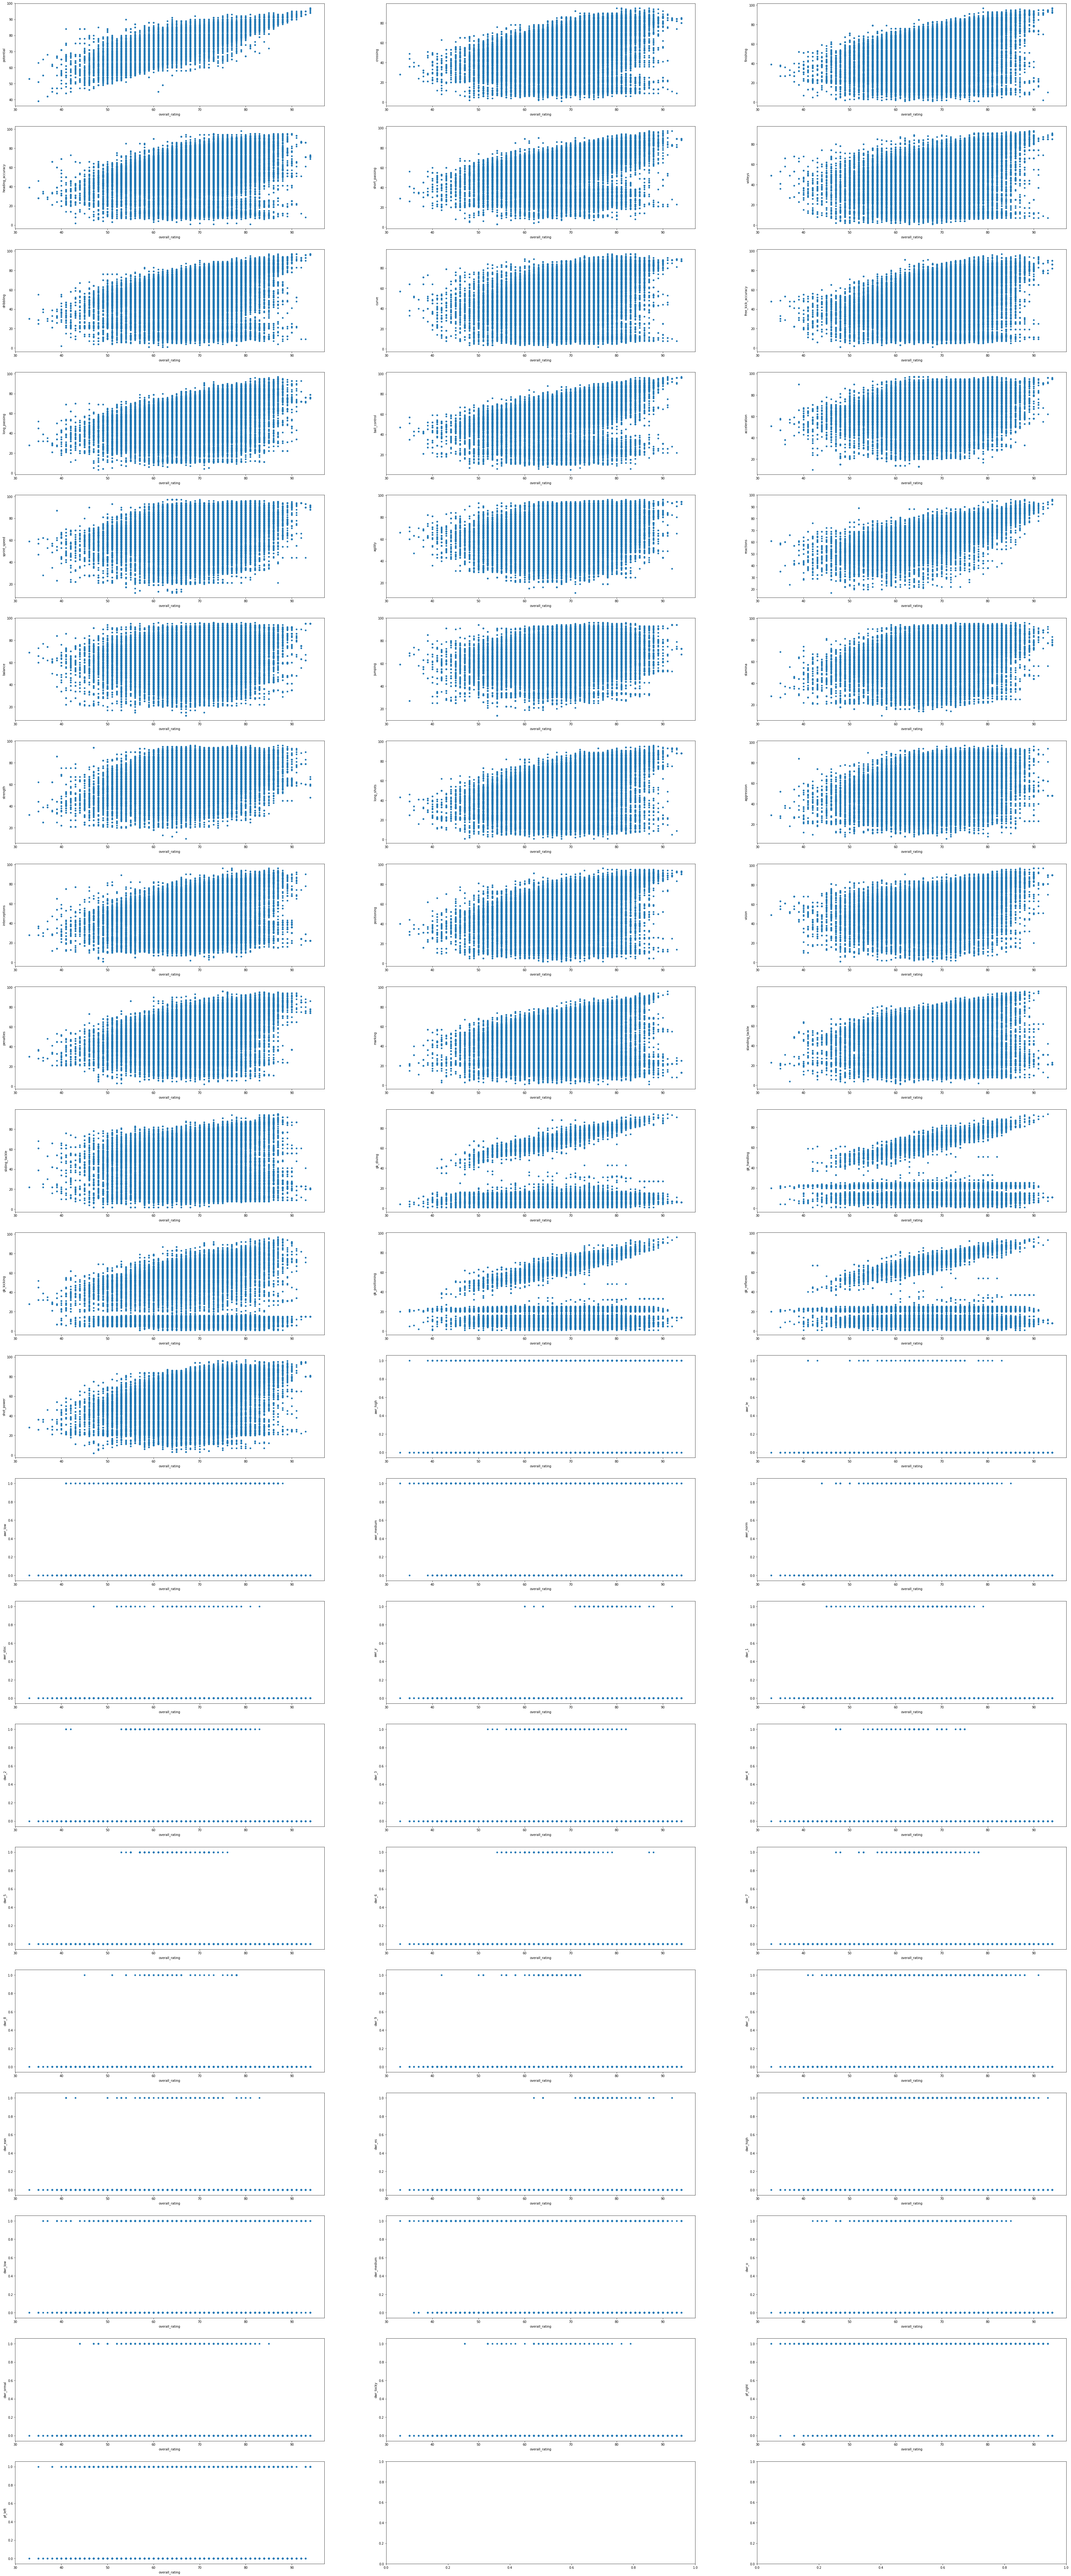

In [37]:
# Data Visualisation
fig, axs = plt.subplots(21, 3)
df.plot(kind='scatter', x='overall_rating', y='potential', ax=axs[0][0], figsize=(60, 150))
df.plot(kind='scatter', x='overall_rating', y='crossing', ax=axs[0][1])
df.plot(kind='scatter', x='overall_rating', y='finishing', ax=axs[0][2])
df.plot(kind='scatter', x='overall_rating', y='heading_accuracy', ax=axs[1][0])
df.plot(kind='scatter', x='overall_rating', y='short_passing', ax=axs[1][1])
df.plot(kind='scatter', x='overall_rating', y='volleys', ax=axs[1][2])
df.plot(kind='scatter', x='overall_rating', y='dribbling', ax=axs[2][0])
df.plot(kind='scatter', x='overall_rating', y='curve', ax=axs[2][1])
df.plot(kind='scatter', x='overall_rating', y='free_kick_accuracy', ax=axs[2][2])
df.plot(kind='scatter', x='overall_rating', y='long_passing', ax=axs[3][0])
df.plot(kind='scatter', x='overall_rating', y='ball_control', ax=axs[3][1])
df.plot(kind='scatter', x='overall_rating', y='acceleration', ax=axs[3][2])
df.plot(kind='scatter', x='overall_rating', y='sprint_speed', ax=axs[4][0])
df.plot(kind='scatter', x='overall_rating', y='agility', ax=axs[4][1])
df.plot(kind='scatter', x='overall_rating', y='reactions', ax=axs[4][2])
df.plot(kind='scatter', x='overall_rating', y='balance', ax=axs[5][0])
df.plot(kind='scatter', x='overall_rating', y='jumping', ax=axs[5][1])
df.plot(kind='scatter', x='overall_rating', y='stamina', ax=axs[5][2])
df.plot(kind='scatter', x='overall_rating', y='strength', ax=axs[6][0])
df.plot(kind='scatter', x='overall_rating', y='long_shots', ax=axs[6][1])
df.plot(kind='scatter', x='overall_rating', y='aggression', ax=axs[6][2])
df.plot(kind='scatter', x='overall_rating', y='interceptions', ax=axs[7][0])
df.plot(kind='scatter', x='overall_rating', y='positioning', ax=axs[7][1])
df.plot(kind='scatter', x='overall_rating', y='vision', ax=axs[7][2])
df.plot(kind='scatter', x='overall_rating', y='penalties', ax=axs[8][0])
df.plot(kind='scatter', x='overall_rating', y='marking', ax=axs[8][1])
df.plot(kind='scatter', x='overall_rating', y='standing_tackle', ax=axs[8][2])
df.plot(kind='scatter', x='overall_rating', y='sliding_tackle', ax=axs[9][0])
df.plot(kind='scatter', x='overall_rating', y='gk_diving', ax=axs[9][1])
df.plot(kind='scatter', x='overall_rating', y='gk_handling', ax=axs[9][2])
df.plot(kind='scatter', x='overall_rating', y='gk_kicking', ax=axs[10][0])
df.plot(kind='scatter', x='overall_rating', y='gk_positioning', ax=axs[10][1])
df.plot(kind='scatter', x='overall_rating', y='gk_reflexes', ax=axs[10][2])
df.plot(kind='scatter', x='overall_rating', y='shot_power', ax=axs[11][0])
df.plot(kind='scatter', x='overall_rating', y='awr_high', ax=axs[11][1])
df.plot(kind='scatter', x='overall_rating', y='awr_le', ax=axs[11][2])
df.plot(kind='scatter', x='overall_rating', y='awr_low', ax=axs[12][0])
df.plot(kind='scatter', x='overall_rating', y='awr_medium', ax=axs[12][1])
df.plot(kind='scatter', x='overall_rating', y='awr_norm', ax=axs[12][2])
df.plot(kind='scatter', x='overall_rating', y='awr_stoc', ax=axs[13][0])
df.plot(kind='scatter', x='overall_rating', y='awr_y', ax=axs[13][1])
df.plot(kind='scatter', x='overall_rating', y='dwr_1', ax=axs[13][2])
df.plot(kind='scatter', x='overall_rating', y='dwr_2', ax=axs[14][0])
df.plot(kind='scatter', x='overall_rating', y='dwr_3', ax=axs[14][1])
df.plot(kind='scatter', x='overall_rating', y='dwr_4', ax=axs[14][2])
df.plot(kind='scatter', x='overall_rating', y='dwr_5', ax=axs[15][0])
df.plot(kind='scatter', x='overall_rating', y='dwr_6', ax=axs[15][1])
df.plot(kind='scatter', x='overall_rating', y='dwr_7', ax=axs[15][2])
df.plot(kind='scatter', x='overall_rating', y='dwr_8', ax=axs[16][0])
df.plot(kind='scatter', x='overall_rating', y='dwr_9', ax=axs[16][1])
df.plot(kind='scatter', x='overall_rating', y='dwr__0', ax=axs[16][2])
df.plot(kind='scatter', x='overall_rating', y='dwr_ean', ax=axs[17][0])
df.plot(kind='scatter', x='overall_rating', y='dwr_es', ax=axs[17][1])
df.plot(kind='scatter', x='overall_rating', y='dwr_high', ax=axs[17][2])
df.plot(kind='scatter', x='overall_rating', y='dwr_low', ax=axs[18][0])
df.plot(kind='scatter', x='overall_rating', y='dwr_medium', ax=axs[18][1])
df.plot(kind='scatter', x='overall_rating', y='dwr_o', ax=axs[18][2])
df.plot(kind='scatter', x='overall_rating', y='dwr_ormal', ax=axs[19][0])
df.plot(kind='scatter', x='overall_rating', y='dwr_tocky', ax=axs[19][1])
df.plot(kind='scatter', x='overall_rating', y='pf_right', ax=axs[19][2])
df.plot(kind='scatter', x='overall_rating', y='pf_left', ax=axs[20][0])

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [39]:
df_new = ['potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'awr_high', 'awr_le', 'awr_low', 'awr_medium',
       'awr_norm', 'awr_stoc',
       'awr_y', 'dwr_1', 'dwr_2', 'dwr_3', 'dwr_4', 'dwr_5',
       'dwr_6', 'dwr_7', 'dwr_8', 'dwr_9', 'dwr__0', 'dwr_ean',
       'dwr_es', 'dwr_high', 'dwr_low', 'dwr_medium', 'dwr_o', 'dwr_ormal',
       'dwr_tocky', 'pf_right','pf_left']
df_new2 = df[df_new]
df_new2.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,dwr_ean,dwr_es,dwr_high,dwr_low,dwr_medium,dwr_o,dwr_ormal,dwr_tocky,pf_right,pf_left
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,1,0,0,0,1,0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,1,0,0,0,1,0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,1,0,0,0,1,0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,1,0,0,0,1,0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
new_y = df['overall_rating']

In [41]:
lm.fit(df_new2,new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lm.coef_

array([ 3.77059829e-01,  2.25952914e-02,  1.19351580e-02,  6.88129908e-02,
        5.15594629e-02,  2.24908131e-03, -1.02573318e-02,  1.14278721e-02,
        1.36905267e-02,  6.48421797e-03,  1.33399121e-01,  5.52663899e-03,
        1.12996565e-02, -8.68253969e-03,  2.06351354e-01,  6.78723843e-03,
        1.63197296e-02,  1.57401383e-02, -2.90656302e-03,  5.92166589e-02,
       -1.29720402e-02,  1.94822450e-02,  1.24124837e-02, -8.01202945e-03,
       -2.64466975e-03,  1.31338481e-02,  3.24888910e-02,  4.74099853e-03,
       -2.84464485e-02,  1.67955288e-01,  3.29503465e-02, -3.32504207e-02,
        5.68373137e-02,  2.44222459e-02,  3.12921753e-01, -6.34923330e+00,
        1.54824776e+00,  2.21318875e-01,  1.82429541e+00, -6.15228653e-01,
       -3.75947588e+00,  4.69178540e-01, -3.66965761e-01,  4.85870059e-01,
       -5.47767236e-01, -3.09181575e-01,  1.20702703e-01,  6.46647622e-01,
        8.43315725e-01,  4.76661100e-01, -5.61010058e-01,  5.48415476e+00,
        3.73592292e+00,  

In [43]:
lm.intercept_

-3.6791729059740845

In [44]:
lm.score(df_new2,new_y)

0.8439915012236183

In [45]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='overall_rating ~ potential+crossing+finishing+heading_accuracy+short_passing+volleys\
         +dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility\
         +reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning\
         +vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking+gk_positioning\
         +gk_reflexes+awr_high+awr_le+awr_low+awr_medium+awr_norm+awr_stoc+awr_y+dwr_1+dwr_2+dwr_3+dwr_4+dwr_5+dwr_6\
         +dwr_7+dwr_8+dwr_9+dwr__0+dwr_ean+dwr_es+dwr_high+dwr_low+dwr_medium+dwr_o+dwr_ormal+dwr_tocky+pf_right+pf_left'
             ,data=df).fit()

In [46]:
lm.conf_int()

,0,1
Intercept,-2.739906,-2.165658
potential,0.374226,0.379894
crossing,0.020957,0.024233
finishing,0.010156,0.013715
heading_accuracy,0.067228,0.070398
short_passing,0.048897,0.054222
volleys,0.000658,0.003840
dribbling,-0.012513,-0.008002
curve,0.009876,0.012980
free_kick_accuracy,0.012316,0.015065


In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:23:54   Log-Likelihood:            -4.4719e+05
No. Observations:              183142   AIC:                         8.945e+05
Df Residuals:                  183082   BIC:                         8.951e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.4528      0.146    -16.743      0.000      -2.740      -2.166
potential              0.3771      0.001    260.754      0.000       0.374       0.380
crossing               0.0226      0.001     27.036      0.000       0.021       0.024
finishing              0.0119      0.001     13.146      0.000       0.010       0.014
heading_accuracy       0.0688      0.001     85.110      0.000       0.067       0.070
short_passing          0.0516      0.001     37.957      0.000       0.049       0.054
volleys                0.0022      0.001      2.770      0.006       0.001       0.004
dribbling             -0.0103      0.001     -8.913      0.000      -0.013      -0.008
curve                  0.0114      0.001     14.432      0.000       0.010       0.013
free_kick_accuracy     0.0137      0.001     19.521      0.000       0.012       0.015
long_passing           0.0065      0.001      6.993      0.000       0.005       0.008
ball_control           0.1334      0.002     85.315      0.000       0.130       0.136
acceleration           0.0055      0.001      4.042      0.000       0.003       0.008
sprint_speed           0.0113      0.001      8.706      0.000       0.009       0.014
agility               -0.0087      0.001     -8.629      0.000      -0.011      -0.007
reactions              0.2064      0.001    192.684      0.000       0.204       0.208
balance                0.0068      0.001      8.721      0.000       0.005       0.008
shot_power             0.0163      0.001     18.822      0.000       0.015       0.018
jumping                0.0157      0.001     21.688      0.000       0.014       0.017
stamina               -0.0029      0.001     -3.556      0.000      -0.005      -0.001
strength               0.0592      0.001     71.123      0.000       0.058       0.061
long_shots            -0.0130      0.001    -14.356      0.000      -0.015      -0.011
aggression             0.0195      0.001     28.545      0.000       0.018       0.021
interceptions          0.0124      0.001     17.113      0.000       0.011       0.014
positioning           -0.0080      0.001    -10.242      0.000      -0.010      -0.006
vision                -0.0026      0.001     -3.056      0.002      -0.004      -0.001
penalties              0.0131      0.001     17.683      0.000       0.012       0.015
marking                0.0325      0.001     29.461      0.000       0.030       0.035
standing_tackle        0.0047      0.001      3.752      0.000       0.002       0.007
sliding_tackle        -0.0284      0.001    -27.169      0.000      -0.030      -0.026
gk_diving              0.1680      0.001    116.417      0.000       0.165       0.171
gk_handling            0.0330      0.002     17.261      0.000       0.029       0.037
gk_kicking            -0.0333      0.0

## Model Evaluation 

In [48]:
y = df['overall_rating']
X = df.drop(['overall_rating'],axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
X_train.shape, X_test.shape, y_test.shape, y_test.shape

((128199, 61), (54943, 61), (54943,), (54943,))

In [51]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
predicted = lm2.predict(X_test)
predicted

array([74.60663865, 52.17614341, 80.92024212, ..., 73.89922724,
       70.71023893, 69.67020058])

In [53]:
lm2.score(X_test,y_test)

0.8429083123335542

In [54]:
# evaluate the model using cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=10)
scores, scores.mean()

(array([0.8487039 , 0.84344208, 0.83602098, 0.83913371, 0.84384047,
        0.840643  , 0.85003238, 0.83501933, 0.84376912, 0.84633602]),
 0.8426940991015295)

###### Accuracy looks good using the 3 evaluations which is around 84%